In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def create_matrix(length):
    return [[0 for j in range(length)] for i in range(length)]

In [ ]:
def average(arr):
    if not arr:
        return 0  # return 0 if the array is empty
    return sum(arr) / len(arr)

In [ ]:
def up(x,y,map):
  map[x][y-1] = 1
  return x,y-1

def down(x,y,map):
  map[x][y+1] = 1
  return x,y+1

def left(x,y,map):
  map[x-1][y] = 1
  return x-1,y

def right(x,y,map):
  map[x+1][y] = 1
  return x+1,y

def direction(d,x,y,map):
  if(d == 0):
    return up(x,y,map)
  elif(d == 1):
    return down(x,y,map)
  elif(d == 2):
    return right(x,y,map)
  else:
    return left(x,y,map)


In [ ]:
def partA():
  rsq = []
  stdeviation = []
  for n in range(4,100):
    avgr = []
    for i in range(20000):
      mapmeasure = create_matrix(101)
      mapmeasure[50][50] = 1
      x = 50
      y = 50
      for j in range(n):
        d = np.random.randint(0,4)
        x,y = direction(d,x,y, mapmeasure)
      #print(x , y)
      avgr.append((x-50)**2 + (y-50)**2)
    rsq.append(average(avgr))
    stdeviation.append(np.std(avgr))

  return rsq,stdeviation


In [ ]:
R_squared,stdeviation = partA()

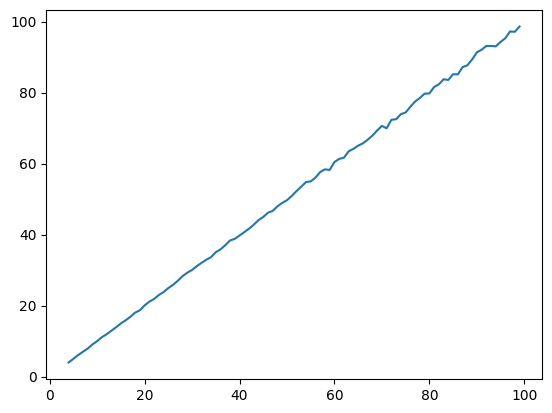

[3.4894388073155835, 4.469898593928055, 5.504572309453296, 6.426693532447304, 7.41128045886809, 8.517864295702298, 9.493742728766144, 10.656544723314402, 11.575112873747711, 12.400901412397408, 13.340804797312643, 14.455115046238822, 15.424350156489576, 16.49082281027845, 17.589239367010727, 18.451823849148354, 19.51717592276096, 20.515089467024026, 21.03669404611856, 22.553189950869477, 23.312631493677415, 24.260624146958794, 25.348067412723992, 26.369192994098245, 27.648832660891852, 28.898100864243656, 29.710095948010668, 30.579364617990347, 31.51477920976125, 32.513385619464486, 33.09058978259529, 34.341776293604845, 35.69821809992762, 36.582737563501176, 37.5642757788567, 38.20418640882174, 38.82658925517409, 40.11337497443964, 41.98458001111836, 42.50417520714877, 43.497008530587486, 44.170503372273224, 45.745137319610265, 46.151878521247646, 47.297165627445374, 47.98664304783155, 49.08139034664768, 50.682302220400366, 51.47267365495987, 52.506319179314026, 54.03257987094453, 53.

In [ ]:
arr = list(range(4, 100))

plt.plot(arr,R_squared)
plt.show()

print(stdeviation)

We can see that  r<sup>2</sup> is linearly related to the n value, which corresponds with time. When we then look for (r<sup>2</sup>)<sup>1/2</sup>, we can see from an eyeball fit that the Flory exponent is approximately 1/2




In [ ]:
def up(x,y,map):
  map[x][y-1] += 1
  return x,y-1,map

def down(x,y,map):
  map[x][y+1] += 1
  return x,y+1,map

def left(x,y,map):
  map[x-1][y] += 1
  return x-1,y,map

def right(x,y,map):
  map[x+1][y] += 1
  return x+1,y,map

def directionSAW(x,y,map):
  testSAW = False
  cnt = 0
  d = -1
  while testSAW == False and cnt < 25:
    d = np.random.randint(0,4)
    cnt+=1
    if(d == 0 and map[x][y-1] != 0):
      testSAW = False
      #print("fail")
    elif(d == 1 and map[x][y+1] != 0):
      testSAW = False
    elif(d == 2 and map[x+1][y] != 0):
      testSAW = False
    elif(d == 3 and map[x-1][y] != 0):
      testSAW = False
    else:
      testSAW = True

  if(d == 0):
    return up(x,y,map)
  if(d == 1):
    return down(x,y,map)
  if(d == 2):
    return right(x,y,map)
  if(d == 3):
    return left(x,y,map)

In [ ]:
def partB():
  rsq = []
  for n in range(4,50):
    avgr = []
    for i in range(10000):
      mapmeasure = create_matrix(101)
      mapmeasure[50][50] = 1
      x = 50
      y = 50
      for j in range(n):
        x,y,mapmeasure = directionSAW(x,y, mapmeasure)
      if(np.max(mapmeasure)<=1):
        avgr.append((x-50)**2 + (y-50)**2)

    rsq.append(average(avgr))

  return rsq

In [ ]:
r2sq = partB()

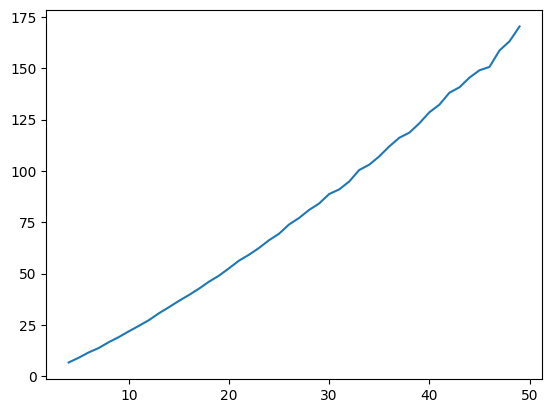

In [ ]:
xaxis = list(range(4,50))
plt.plot(xaxis,r2sq)

In [ ]:
arr = []
for i in range(len(r2sq)-1):
  arr.append(r2sq[i+1]/r2sq[i])
xlist = []
for i in range(len(r2sq)-1):
  xlist.append(1/(i+4))

0.6700464202600824


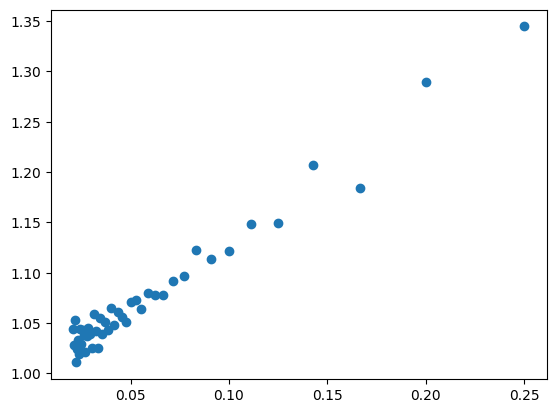

In [ ]:
plt.scatter(xlist,arr)

a, b = np.polyfit(xlist,arr,1)
print(a/2)

Using formula 1 we find the Flora exponent to be .6700. While this is innacurate to the real value, this can be explained as our data is not as accurate as it could be, owing to the low levels of runtime and resources that I could work with on this project.

Using the same formula on partA we get the below value.

0.4956109672213829


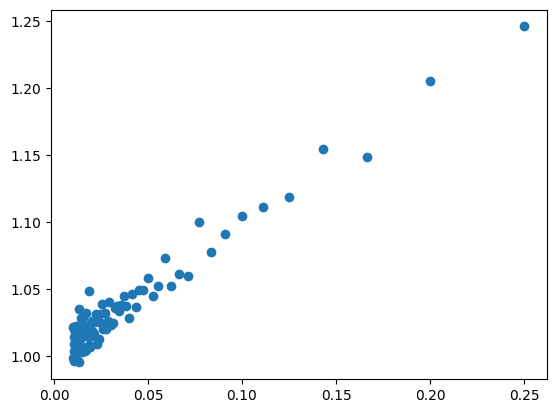

In [ ]:
arr = []
for i in range(len(R_squared)-1):
  arr.append(R_squared[i+1]/R_squared[i])
xlist = []
for i in range(len(R_squared)-1):
  xlist.append(1/(i+4))

plt.scatter(xlist,arr)

a, b = np.polyfit(xlist,arr,1)
print(a/2)

We can see that the value matches up to and is very similar to the value we obtained from the previous value.

Part C

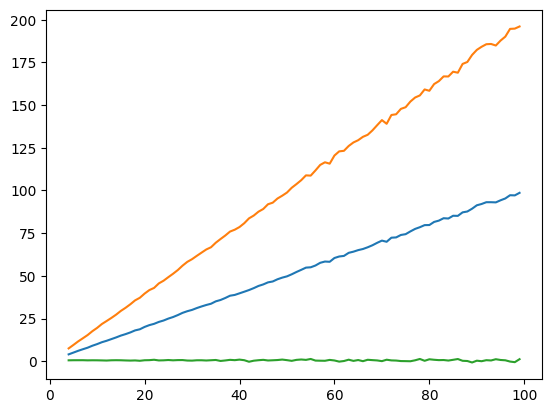

[3.4894388073155835, 4.469898593928055, 5.504572309453296, 6.426693532447304, 7.41128045886809, 8.517864295702298, 9.493742728766144, 10.656544723314402, 11.575112873747711, 12.400901412397408, 13.340804797312643, 14.455115046238822, 15.424350156489576, 16.49082281027845, 17.589239367010727, 18.451823849148354, 19.51717592276096, 20.515089467024026, 21.03669404611856, 22.553189950869477, 23.312631493677415, 24.260624146958794, 25.348067412723992, 26.369192994098245, 27.648832660891852, 28.898100864243656, 29.710095948010668, 30.579364617990347, 31.51477920976125, 32.513385619464486, 33.09058978259529, 34.341776293604845, 35.69821809992762, 36.582737563501176, 37.5642757788567, 38.20418640882174, 38.82658925517409, 40.11337497443964, 41.98458001111836, 42.50417520714877, 43.497008530587486, 44.170503372273224, 45.745137319610265, 46.151878521247646, 47.297165627445374, 47.98664304783155, 49.08139034664768, 50.682302220400366, 51.47267365495987, 52.506319179314026, 54.03257987094453, 53.

In [ ]:
arr = list(range(4, 100))

stdlistplus = np.add(R_squared, stdeviation)
stdlistminus = np.subtract(R_squared, stdeviation)
plt.plot(arr,R_squared)
plt.plot(arr,stdlistplus)
plt.plot(arr,stdlistminus)
plt.show()

print(stdeviation)

In [ ]:
arr = []
for i in range(len(stdeviation)-1):
  arr.append(stdeviation[i+1]/stdeviation[i])
xlist = []
for i in range(len(stdeviation)-1):
  xlist.append(1/(i+4))

a, b = np.polyfit(xlist,arr,1)
print(a/2)

0.5538217411045069


Above is the x value of the exponent we were trying to solve for.

In [ ]:
def up(x,y,z,map):
  map[x][y-1][z] += 1
  return x,y-1,z,map

def down(x,y,z,map):
  map[x][y+1][z] += 1
  return x,y+1,z,map

def left(x,y,z,map):
  map[x-1][y][z] += 1
  return x-1,y,z,map

def right(x,y,z,map):
  map[x+1][y][z] += 1
  return x+1,y,z,map

def into(x,y,z,map):
  map[x][y][z+1] += 1
  return x,y,z+1,map

def out(x,y,z,map):
  map[x][y][z-1] += 1
  return x,y,z-1,map

def directionSAW(x,y,z,map):
  testSAW = False
  cnt = 0
  d = -1
  while testSAW == False and cnt < 25:
    d = np.random.randint(0,6)
    cnt+=1
    if(d == 0 and map[x][y-1][z]!= 0):
      testSAW = False
      #print("fail")
    elif(d == 1 and map[x][y+1][z]!= 0):
      testSAW = False
    elif(d == 2 and map[x+1][y][z] != 0):
      testSAW = False
    elif(d == 3 and map[x-1][y][z] != 0):
      testSAW = False
    elif(d == 4 and map[x][y][z+1] != 0):
      testSAW = False
    elif(d == 5 and map[x][y][z-1] != 0):
      testSAW = False
    else:
      testSAW = True

  if(d == 0):
    return up(x,y,z,map)
  if(d == 1):
    return down(x,y,z,map)
  if(d == 2):
    return right(x,y,z,map)
  if(d == 3):
    return left(x,y,z,map)
  if(d == 4):
    return into(x,y,z,map)
  if(d == 5):
    return out(x,y,z,map)

def create_matrix3D(length):
    return [[[0 for j in range(length)]for k in range(length)] for i in range(length)]

In [ ]:
def partD():
  rsq = []
  for n in range(4,50):
    avgr = []
    for i in range(500):
      mapmeasure = create_matrix3D(51)
      mapmeasure[25][25][25] = 1
      x = 25
      y = 25
      z = 25
      for j in range(n):
        x,y,z,mapmeasure = directionSAW(x,y,z, mapmeasure)
      if(np.max(mapmeasure)<=1):
        avgr.append((x-25)**2 + (y-25)**2 + (z-25)**2)

    rsq.append(average(avgr))

  return rsq

In [ ]:
rsq = partD()

In [ ]:
rsq

[5.504,
 6.888,
 8.596,
 10.244,
 12.056,
 13.796,
 15.344,
 17.284,
 19.164,
 20.82,
 21.544,
 23.736,
 26.516,
 27.408,
 29.384,
 33.068,
 34.248,
 33.768,
 38.276,
 38.764,
 40.26052104208417,
 43.48897795591182,
 45.69477911646587,
 45.708,
 47.324,
 46.98,
 51.434869739478955,
 54.377510040160644,
 54.088,
 55.864,
 58.76953907815631,
 56.868,
 60.752,
 67.008,
 62.876,
 68.376,
 73.208,
 70.588,
 70.48496993987976,
 74.57515030060121,
 76.72289156626506,
 77.072,
 83.12625250501002,
 80.116,
 87.36418511066398,
 87.84738955823293]

In [ ]:
arr = []
for i in range(len(r2sq)-1):
  arr.append(r2sq[i+1]/r2sq[i])
xlist = []
for i in range(len(r2sq)-1):
  xlist.append(1/(i+4))

a, b = np.polyfit(xlist,arr,1)
print(a/2)

0.6700464202600824


it seems that independent of the number of dimensions the value of the Flory exponent remains the same. It seems that my calculation for both values is the same and equidistant from both values while fully populating both fields. I believe this might have to do with the size of my sample but unfortunately I do not have access to the computing resources that I would need to fix this error.